In [46]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit import Aer
from qiskit.visualization import plot_state_city
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor


# Loading your IBM Q account(s)
provider = IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


Przygotowanie obwodu:


In [50]:
circ = QuantumCircuit(2)
circ.iden(0)
circ.y(0)
circ.iden(0)
circ.iden(0)
circ.iden(0)
circ.iden(0)


Pokazanie obwodu:

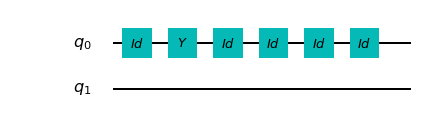

In [51]:
circ.draw()

Przygotowanie obwodu z pomiarem na końcu

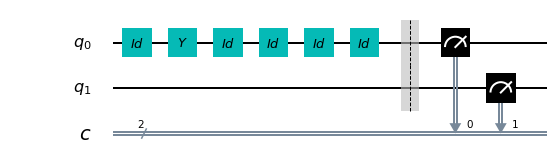

In [52]:
meas = QuantumCircuit(2, 2)
meas.barrier(range(2))
meas.measure(range(2),range(2))
qc = circ+meas
qc.draw()

In [ ]:
Test na dekoherencję:

In [62]:
sim_backend = Aer.get_backend('qasm_simulator')
sim_job = execute(qc, sim_backend, shots = 1024)
sim_result = sim_job.result()

real_backend = provider.get_backend('ibmq_essex')
real_job = execute(qc, backend = real_backend)
job_monitor(real_job)
real_result = real_job.result()

Job Status: job has successfully run


Wyniki:

In [63]:
sim_counts = sim_result.get_counts(qc)
print(sim_counts)
real_counts = real_result.get_counts(qc)
print(real_counts)

{'01': 1024}
{'11': 36, '01': 940, '10': 1, '00': 47}


In [ ]:
Jak widać powyżej, mimo iż oczekiwany stan końcowy to '01',
na prawdziwym komputerze występują również inne stany,
jest to skutkiem błędów na poszczególnych bramkach 

Układ do drugiej części:

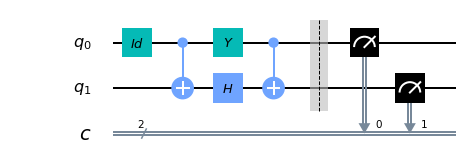

In [79]:
circ2 = QuantumCircuit(2)
circ2.iden(0)
circ2.cx(0,1)
circ2.h(1)
circ2.y(0)
circ2.cx(0,1)
meas2 = QuantumCircuit(2, 2)
meas2.barrier(range(2))
meas2.measure(range(2),range(2))
qc2 = circ2+meas2
qc2.draw()

Amplitudy stanów:

In [80]:
backend = Aer.get_backend('statevector_simulator')
job = execute(circ2, backend)
result = job.result()
outputstate = result.get_statevector(circ2, decimals=3)
print(outputstate)

[0.+0.j    0.+0.707j 0.+0.j    0.+0.707j]


In [ ]:
Powyższy wektor prezentuje aplitudy dla poszczególnych stanów wyjściowych

In [ ]:
Macierz gęstości:

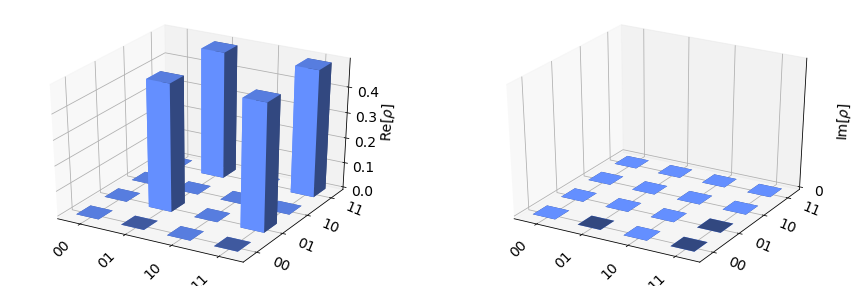

In [81]:
plot_state_city(outputstate)

In [ ]:
Macierz gęstości dla symulatora reprezentuje stany czyste, wyznaczone poprzez pomnożenie Ket przez Bra z danego stanu wyjściowego

In [ ]:
Histogram z symulatora:

{'11': 496, '01': 528}


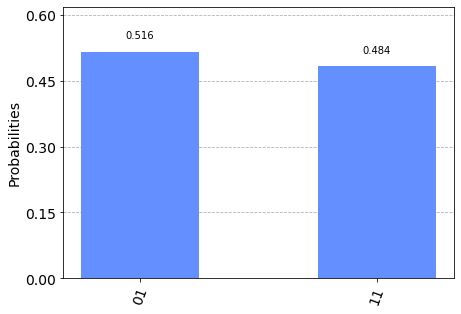

In [84]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qc2, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc2)
print(counts)
plot_histogram(counts)

Histogram pokazuje wyniki dla 1024 prób, wyniki nie są rozłożone po równo jak w wektorze stanu, 
ze względu na to,że stan wyjściowy jest określony z pewnym prawdopodobieństwem, w naszym przypadku,
01 i 11 mają prawdopodobieństwo 1/2.

Histogram z prawdziwego komputera:

Job Status: job has successfully run


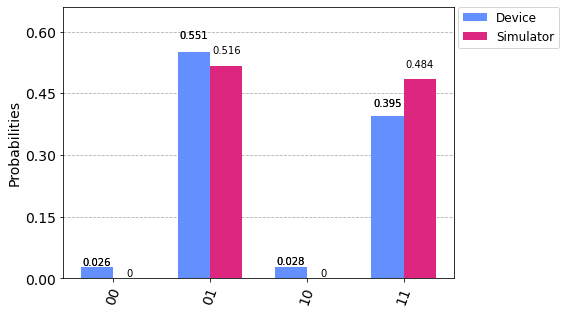

In [85]:
backend = provider.get_backend('ibmq_essex')
job_exp = execute(qc2, backend=backend)
job_monitor(job_exp)
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(qc2)
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])

In [ ]:
Na histogramie są również stany które nie pojawiły się w symulatorze,
ze względu na błędy generowane na poszczególnych bramkach.